In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model


In [2]:
# 绘制决策边界
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    #绘制网格
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.range(y_min, y_max, h))
    
    Z = model(np.c_[xx,ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y),cmap=plt.cm.Spectral)
    
    

In [3]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


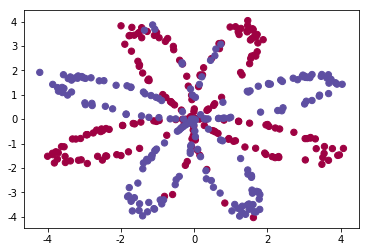

In [9]:
def load_planer_dataset():
    np.random.seed(1)
    m = 400 #number of examples
    N = int(m / 2) # number of points per class
    D = 2 #dimensionality
    X = np.zeros((m, D))
    Y = np.zeros((m, 1))
    a = 4 #maximum ray of the flower
    
    for j in range(2):
        ix = range(N*j, N*(j+1))
        t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
        r = a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    X = X.T
    Y = Y.T
    
    return X, Y

def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

X, Y = load_planer_dataset()
#可视化数据集
plt.scatter(X[0,:], X[1,:],c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)